Mills College

CS 141-241, Machine Learning Fall 2018

Instructor: Jahan Ghofraniha

Final Project

Due date: 12/18/2018

Ian de Heer and Juliana de Heer

### Helpful Resources:


*   Data description: https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b
*   panyao's Solution: https://github.com/panyao/instacart-solution
  * panyao's EDA: https://github.com/panyao/instacart-solution/blob/master/exploration/Data%20Exploratory%20for%20Instacart%20Market%20Basket%20Analysis.ipynb
*   Phillipp's EDA: https://www.kaggle.com/philippsp/exploratory-analysis-instacart/notebook
*   Logistic Regression Solution: https://towardsdatascience.com/whats-in-your-customer-s-next-shopping-cart-73d64287ec53
*   Someone's approach to handling the raw dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/34727
*   Deep Learning Solution (3rd place): https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/38097
*   Data Engineering + Boosting Solution (2nd place): https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/38143
  * Interview: http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/
*   Relationships between csv files: https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/33128
*   Solutions summary: https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/38130

In [2]:
import pandas as pd
import numpy as np

aisles_data = pd.read_csv('aisles.csv')
print("Number of aisles: ", len(aisles_data.aisle_id.unique()))
aisles_data.head()

Number of aisles:  134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
departments_data = pd.read_csv('departments.csv')
print("Number of departments: ", len(departments_data.department_id.unique()))
departments_data.head()

Number of departments:  21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
orders_data = pd.read_csv('orders.csv')
print("Number of orders: ", len(orders_data.order_id.unique()))
print("Number of customers: ", len(orders_data.user_id.unique()))
orders_data.head()

Number of orders:  3421083
Number of customers:  206209


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
print(orders_data.shape)
print(orders_data.eval_set.unique())

(3421083, 7)
['prior' 'train' 'test']


In [6]:
products_data = pd.read_csv('products.csv')
print("Number of products: ", len(products_data.product_id.unique()))
products_data.head()

Number of products:  49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [8]:
op_prior = pd.read_csv('order_products__prior.csv')
print(op_prior.shape)
op_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
op_train = pd.read_csv('order_products__train.csv')
print(op_train.shape)
op_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
prior_products = pd.merge(op_prior,products_data, on="product_id", how="inner")
prior_products.drop('product_name', inplace=True, axis=1)
print("prior_products: ", prior_products.shape)
prior_products.head()

prior_products:  (32434489, 6)


,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,2,33120,1,1,86,16
1,26,33120,5,0,86,16
2,120,33120,13,0,86,16
3,327,33120,5,1,86,16
4,390,33120,28,1,86,16


In [11]:
prior_products_orders = pd.merge(prior_products,orders_data, on="order_id", how="inner")[['eval_set', 'user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'aisle_id', 'department_id', 'add_to_cart_order', 'reordered']]
print("prior_products_orders: ", prior_products_orders.shape)
prior_products_orders.head()

prior_products_orders:  (32434489, 12)


,eval_set,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id,add_to_cart_order,reordered
0,prior,202279,2,3,5,9,8.0,33120,86,16,1,1
1,prior,202279,2,3,5,9,8.0,28985,83,4,2,1
2,prior,202279,2,3,5,9,8.0,9327,104,13,3,0
3,prior,202279,2,3,5,9,8.0,45918,19,13,4,1
4,prior,202279,2,3,5,9,8.0,30035,17,13,5,0


In [26]:
###Delete
testdf = prior_products_orders.loc[prior_products_orders['user_id'] < 5].sort_values(['user_id', 'order_number', 'product_id', 'department_id', 'aisle_id'])
testdf = testdf[['eval_set', 'user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'aisle_id', 'department_id', 'add_to_cart_order', 'reordered']]
testdf.head(500)

,eval_set,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id,add_to_cart_order,reordered
22667633,prior,1,2539329,1,2,8,NaN,196,77,7,1,0
22667636,prior,1,2539329,1,2,8,NaN,12427,23,19,3,0
22667634,prior,1,2539329,1,2,8,NaN,14084,91,16,2,0
22667635,prior,1,2539329,1,2,8,NaN,26088,23,19,4,0
22667637,prior,1,2539329,1,2,8,NaN,26405,54,17,5,0
10549933,prior,1,2398795,2,3,7,15.0,196,77,7,1,1
10549936,prior,1,2398795,2,3,7,15.0,10258,117,19,2,0
10549937,prior,1,2398795,2,3,7,15.0,12427,23,19,3,1
10549934,prior,1,2398795,2,3,7,15.0,13032,121,14,6,0
10549932,prior,1,2398795,2,3,7,15.0,13176,24,4,4,0


In [29]:
###Delete
testdf['user_product_id'] = testdf.product_id + testdf.user_id.astype(np.int64) * 100000
testdf['total_orders'] = testdf.groupby(['user_product_id'])['order_number'].transform('count')
# reorder_total
# order ratio
# testdf['total_orders'] = testdf.groupby('user_product').count()
print(testdf.shape)
testdf.head(360)
# df.groupby('topping')['discount'].apply(lambda x: x.count())

# userXproduct.columns = ['nb_orders', 'last_order_id', 'sum_pos_in_cart', 'first_order', 'last_order', 
#                             'rate_since_first_order', 'weight', 'weight_day', 'weight_exp']
#     userXproduct.nb_orders = userXproduct.nb_orders.astype(np.int16)
#     userXproduct.last_order_id = userXproduct.last_order_id.map(lambda x: x[1]).astype(np.int32)
#     userXproduct.sum_pos_in_cart = userXproduct.sum_pos_in_cart.astype(np.int16)
#     userXproduct.rate_since_first_order = userXproduct.nb_orders/(userXproduct.rate_since_first_order-userXproduct.first_order+1).astype(np.float32)
    
#     userXproduct.first_order = userXproduct.first_order.astype(np.int16)
#     userXproduct.last_order = userXproduct.last_order.astype(np.int16)
#     userXproduct.weight = userXproduct.weight.astype(np.float32)
#     userXproduct.weight_day = userXproduct.weight_day.astype(np.float32)
#     userXproduct.weight_exp = userXproduct.weight_exp.astype(np.float32)

(360, 14)


,eval_set,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id,add_to_cart_order,reordered,user_product,total_orders
22667633,prior,1,2539329,1,2,8,NaN,196,77,7,1,0,100196,10
22667636,prior,1,2539329,1,2,8,NaN,12427,23,19,3,0,112427,10
22667634,prior,1,2539329,1,2,8,NaN,14084,91,16,2,0,114084,1
22667635,prior,1,2539329,1,2,8,NaN,26088,23,19,4,0,126088,2
22667637,prior,1,2539329,1,2,8,NaN,26405,54,17,5,0,126405,2
10549933,prior,1,2398795,2,3,7,15.0,196,77,7,1,1,100196,10
10549936,prior,1,2398795,2,3,7,15.0,10258,117,19,2,0,110258,9
10549937,prior,1,2398795,2,3,7,15.0,12427,23,19,3,1,112427,10
10549934,prior,1,2398795,2,3,7,15.0,13032,121,14,6,0,113032,3
10549932,prior,1,2398795,2,3,7,15.0,13176,24,4,4,0,113176,2


In [36]:
###Delete
testdf['reorder_total'] = testdf.groupby(['user_product_id'])['reordered'].transform('sum')
testdf['no_of_orders'] = testdf.groupby(['user_id'])['order_number'].transform('max')
testdf['order_ratio'] = (testdf['reorder_total'] + 1) / testdf['no_of_orders']
testdf.head(360)

,eval_set,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id,add_to_cart_order,reordered,user_product,total_orders,reorder_total,order_ratio,no_of_orders
22667633,prior,1,2539329,1,2,8,NaN,196,77,7,1,0,100196,10,9,1.000000,10
22667636,prior,1,2539329,1,2,8,NaN,12427,23,19,3,0,112427,10,9,1.000000,10
22667634,prior,1,2539329,1,2,8,NaN,14084,91,16,2,0,114084,1,0,0.100000,10
22667635,prior,1,2539329,1,2,8,NaN,26088,23,19,4,0,126088,2,1,0.200000,10
22667637,prior,1,2539329,1,2,8,NaN,26405,54,17,5,0,126405,2,1,0.200000,10
10549933,prior,1,2398795,2,3,7,15.0,196,77,7,1,1,100196,10,9,1.000000,10
10549936,prior,1,2398795,2,3,7,15.0,10258,117,19,2,0,110258,9,8,0.900000,10
10549937,prior,1,2398795,2,3,7,15.0,12427,23,19,3,1,112427,10,9,1.000000,10
10549934,prior,1,2398795,2,3,7,15.0,13032,121,14,6,0,113032,3,2,0.300000,10
10549932,prior,1,2398795,2,3,7,15.0,13176,24,4,4,0,113176,2,1,0.200000,10


In [12]:
prior_products_orders['user_product_id'] = prior_products_orders.product_id + prior_products_orders.user_id.astype(np.int64) * 100000
prior_products_orders['reorder_total'] = prior_products_orders.groupby(['user_product_id'])['reordered'].transform('sum')
prior_products_orders['no_of_orders'] = prior_products_orders.groupby(['user_id'])['order_number'].transform('max')
prior_products_orders['order_ratio'] = (prior_products_orders['reorder_total'] + 1) / prior_products_orders['no_of_orders']
print(prior_products_orders.shape)
prior_products_orders.head()

(32434489, 16)


,eval_set,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id,add_to_cart_order,reordered,user_product_id,reorder_total,no_of_orders,order_ratio
0,prior,202279,2,3,5,9,8.0,33120,86,16,1,1,20227933120,4,8,0.625
1,prior,202279,2,3,5,9,8.0,28985,83,4,2,1,20227928985,4,8,0.625
2,prior,202279,2,3,5,9,8.0,9327,104,13,3,0,20227909327,0,8,0.125
3,prior,202279,2,3,5,9,8.0,45918,19,13,4,1,20227945918,4,8,0.625
4,prior,202279,2,3,5,9,8.0,30035,17,13,5,0,20227930035,2,8,0.375


In [13]:
print(prior_products_orders.eval_set.unique())
#3421083
print(len(prior_products_orders.order_id.unique()))
# train = prior_products_orders.loc[prior_products_orders['eval_set'] == 'train']
# train.head()

prior_products_orders.loc[prior_products_orders['user_id'] == 112108].sort_values(['user_id', 'order_number', 'product_id', 'department_id', 'aisle_id'])


['prior']
3214874


,eval_set,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id,add_to_cart_order,reordered,user_product_id,reorder_total,no_of_orders,order_ratio
30058910,prior,112108,1427983,1,1,14,NaN,11109,108,16,6,0,11210811109,1,3,0.666667
30058907,prior,112108,1427983,1,1,14,NaN,14947,115,7,7,0,11210814947,2,3,1.000000
30058906,prior,112108,1427983,1,1,14,NaN,22035,21,16,5,0,11210822035,1,3,0.666667
30058911,prior,112108,1427983,1,1,14,NaN,30881,95,15,3,0,11210830881,1,3,0.666667
30058909,prior,112108,1427983,1,1,14,NaN,42001,95,15,1,0,11210842001,0,3,0.333333
30058912,prior,112108,1427983,1,1,14,NaN,43633,95,15,2,0,11210843633,1,3,0.666667
30058908,prior,112108,1427983,1,1,14,NaN,44359,83,4,8,0,11210844359,1,3,0.666667
30058913,prior,112108,1427983,1,1,14,NaN,49302,120,16,4,0,11210849302,1,3,0.666667
19101416,prior,112108,2541372,2,1,10,7.0,2067,3,19,7,0,11210802067,0,3,0.333333
19101421,prior,112108,2541372,2,1,10,7.0,5707,3,19,8,0,11210805707,1,3,0.666667


In [14]:
labels = pd.merge(op_train,orders_data, on="order_id", how="inner")[['eval_set', 'user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered']]
print("labels: ", labels.shape)
print("Number of customers: ", len(labels.user_id.unique()))
print("Number of orders: ", len(labels.order_id.unique()))
print("This is the last order of 131,209 customers, which will be used to create the Y label and train the model.")
labels.head()


labels:  (1384617, 10)
Number of customers:  131209
Number of orders:  131209
This is the last order of 131,209 customers, which will be used to create the Y label and train the model.


,eval_set,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,train,112108,1,4,4,10,9.0,49302,1,1
1,train,112108,1,4,4,10,9.0,11109,2,1
2,train,112108,1,4,4,10,9.0,10246,3,0
3,train,112108,1,4,4,10,9.0,49683,4,0
4,train,112108,1,4,4,10,9.0,43633,5,1


In [15]:
labels['user_product_id'] = labels.product_id + labels.user_id.astype(np.int64) * 100000
labels['in_last_order'] = 1
labels.drop(['eval_set', 'user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered'], inplace=True, axis=1)
labels.head()

,user_product_id,in_last_order
0,11210849302,1
1,11210811109,1
2,11210810246,1
3,11210849683,1
4,11210843633,1


In [16]:
training_data = prior_products_orders.drop(['eval_set','order_id','order_number','order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered'], axis=1)
print(training_data.shape)
training_data.head()

(32434489, 8)


,user_id,product_id,aisle_id,department_id,user_product_id,reorder_total,no_of_orders,order_ratio
0,202279,33120,86,16,20227933120,4,8,0.625
1,202279,28985,83,4,20227928985,4,8,0.625
2,202279,9327,104,13,20227909327,0,8,0.125
3,202279,45918,19,13,20227945918,4,8,0.625
4,202279,30035,17,13,20227930035,2,8,0.375


In [17]:
training_data.drop_duplicates(subset=['user_product_id'], inplace=True)
print(training_data.shape)
training_data.head()

(13307953, 8)


,user_id,product_id,aisle_id,department_id,user_product_id,reorder_total,no_of_orders,order_ratio
0,202279,33120,86,16,20227933120,4,8,0.625
1,202279,28985,83,4,20227928985,4,8,0.625
2,202279,9327,104,13,20227909327,0,8,0.125
3,202279,45918,19,13,20227945918,4,8,0.625
4,202279,30035,17,13,20227930035,2,8,0.375


In [18]:
print(len(training_data.user_product_id.unique()))

13307953


In [19]:
training_data_test = pd.merge(training_data, labels, how='left', on='user_product_id')
training_data_test['in_last_order'].fillna(0, inplace=True)
training_data_test['in_last_order'] = training_data_test['in_last_order'].astype('int32')
# # dtype={'user_id': int, 'product_id': int, 'aisle_id': int, 'department_id': int, 'reorder_total': int, 'no_of_orders': int}
# # temp.apply(lambda x: x.astype(training_data[x.name]))
# print(training_data_test.shape)
# print("Number of rows in prior: ", len(prior_products_orders))
training_data_test.head()
# assert(len(prior_products_orders) == len(training_data))

,user_id,product_id,aisle_id,department_id,user_product_id,reorder_total,no_of_orders,order_ratio,in_last_order
0,202279,33120,86,16,20227933120,4,8,0.625,1
1,202279,28985,83,4,20227928985,4,8,0.625,0
2,202279,9327,104,13,20227909327,0,8,0.125,0
3,202279,45918,19,13,20227945918,4,8,0.625,0
4,202279,30035,17,13,20227930035,2,8,0.375,0


In [20]:
print(training_data_test.shape)

(13307953, 9)


In [21]:
X = training_data_test.drop(['in_last_order','user_product_id'], axis=1)
y = training_data_test['in_last_order']

In [22]:
pd.set_option('display.width', 100)
pd.set_option('precision', 1)
print(training_data_test.describe())

       user_id  product_id  aisle_id  department_id  user_product_id  reorder_total  no_of_orders  \
count  1.3e+07     1.3e+07   1.3e+07        1.3e+07          1.3e+07        1.3e+07       1.3e+07   
mean   1.0e+05     2.6e+04   7.1e+01        1.0e+01          1.0e+10        1.4e+00       2.5e+01   
std    5.9e+04     1.4e+04   3.8e+01        6.2e+00          5.9e+09        3.6e+00       2.2e+01   
min    1.0e+00     1.0e+00   1.0e+00        1.0e+00          1.0e+05        0.0e+00       3.0e+00   
25%    5.2e+04     1.3e+04   3.2e+01        4.0e+00          5.2e+09        0.0e+00       9.0e+00   
50%    1.0e+05     2.6e+04   8.1e+01        1.1e+01          1.0e+10        0.0e+00       1.8e+01   
75%    1.5e+05     3.8e+04   1.1e+02        1.6e+01          1.5e+10        1.0e+00       3.5e+01   
max    2.1e+05     5.0e+04   1.3e+02        2.1e+01          2.1e+10        9.8e+01       9.9e+01   

       order_ratio  in_last_order  
count      1.3e+07        1.3e+07  
mean       1.5e-01

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

plt.figure()
corMat = training_data_test.corr(method='pearson')
print(corMat)

                 user_id  product_id  aisle_id  department_id  user_product_id  reorder_total  \
user_id          1.0e+00    -2.4e-04   2.3e-05        3.3e-04          1.0e+00       -7.1e-04   
product_id      -2.4e-04     1.0e+00   3.7e-03       -2.6e-02         -2.4e-04        3.0e-03   
aisle_id         2.3e-05     3.7e-03   1.0e+00        2.7e-02          2.3e-05        3.2e-03   
department_id    3.3e-04    -2.6e-02   2.7e-02        1.0e+00          3.3e-04       -3.3e-02   
user_product_id  1.0e+00    -2.4e-04   2.3e-05        3.3e-04          1.0e+00       -7.1e-04   
reorder_total   -7.1e-04     3.0e-03   3.2e-03       -3.3e-02         -7.1e-04        1.0e+00   
no_of_orders    -3.8e-03    -2.7e-03  -2.8e-03        2.0e-02         -3.8e-03        2.4e-01   
order_ratio      4.1e-04     4.7e-03   6.0e-03       -4.9e-02          4.1e-04        4.7e-01   
in_last_order   -4.2e-04     2.1e-03   1.8e-03       -2.6e-02         -4.2e-04        1.9e-01   

                 no_of_orders

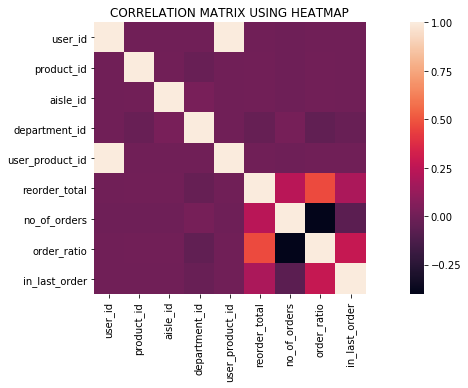

In [24]:
plt.figure(figsize = (16,5))
sns.heatmap(corMat, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("CORRELATION MATRIX USING HEATMAP")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22e1ecc0>,
      dtype=object)

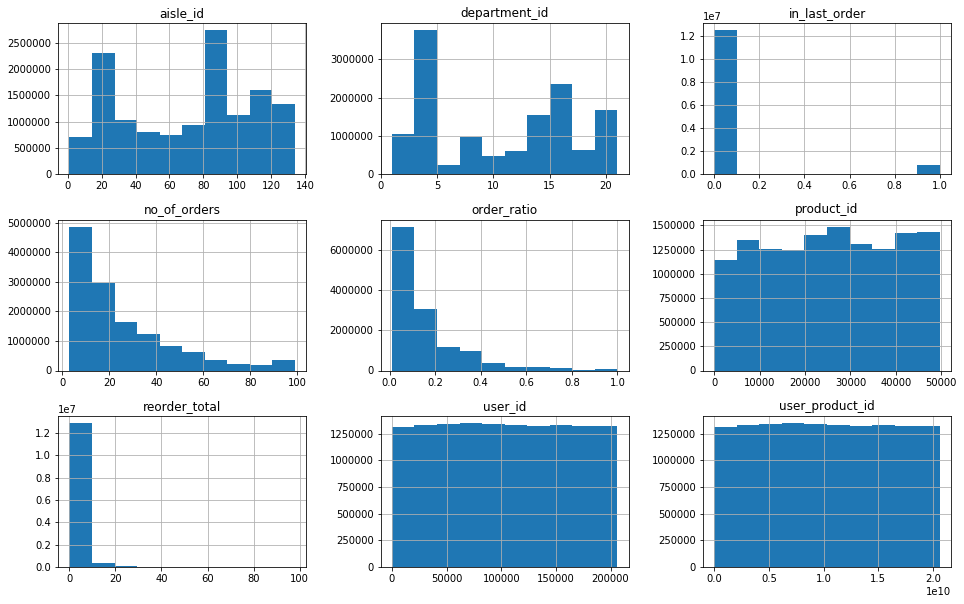

In [25]:
training_data_test.hist(figsize=(16, 10))

In [ ]:
scatter_matrix(training_data_test, figsize=(20,20))
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9378120079305949
0.9378120079305949


No handles with labels found to put in legend.
/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


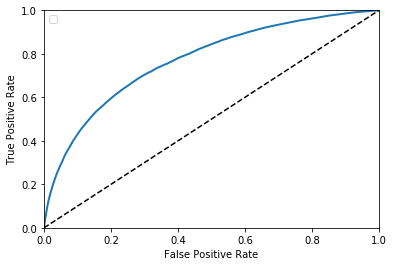

In [ ]:
from sklearn.model_selection import train_test_split

# split into training and test sets   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

 #   Bagging ensembles

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# determine accuracy score for the bagging method
print(accuracy_score(y_test, y_pred))

# now use a standard decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
# compare bagging method with standard decision tree classifier


# Random Forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_prob_rf = rnd_clf.predict_proba(X_test)

y_pred_rf = rnd_clf.predict(X_test)

np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

y_score_rf = y_prob_rf[:,1]
fpr_rf,tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)

# ROC curve plotting
def plot_roc_curve(fpr, tpr, lable=None):
    plt.plot(fpr,tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr_rf,tpr_rf)
plt.legend(loc="bottom right")
plt.show()

# Out-of-Bag evaluation
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)



# Boosting method, three boosting algorithms
# First Ada boost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)